<h2>PART 0: IMPORTS LIBRALIES</h2>

In [178]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_fscore_support, roc_auc_score
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
import joblib
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print(" All libraries imported successfully")


 All libraries imported successfully


<H2>PART 1: DATASET LOADING</H2>

In [179]:
df = pd.read_csv('data/heart_disease_dataset_CHUD_S_A.csv')

print(f"\nLength of Total Sample:")
print(len(df))
X = df.drop(columns=[target_col])
print("Length of total features:", X.shape[1])

print(f"\nFirst 5 Rows:")
print(df.head())
print(f"\nSum of missing values for all features:")
print(df.isnull().sum())



Length of Total Sample:
5000
Length of total features: 13

First 5 Rows:
         age     sex                cp    trestbps        chol    fbs  \
0  38.871687    Male    Typical Angina  100.490248  163.166661    NaN   
1  60.625755    Male      Asymptomatic         NaN  338.711395   True   
2  64.306898    Male               NaN  146.355656  337.004035   True   
3  57.457313  Female  Non-Anginal Pain         NaN  260.116075   True   
4  53.394739    Male  Non-Anginal Pain  129.763455  224.948879  False   

          restecg     thalach exang   oldpeak        slope   ca  \
0  LV hypertrophy  183.658119    No  0.114644    Upsloping  0.0   
1  LV hypertrophy  141.161921   NaN  2.361526  Downsloping  2.0   
2  LV hypertrophy         NaN   Yes  2.660477  Downsloping  2.0   
3             NaN  150.353969   Yes  1.145959         Flat  1.0   
4  LV hypertrophy  147.834030   Yes       NaN         Flat  NaN   

                thal heart_disease  
0             Normal    no disease  
1         

<H2>PART 2: EXPLORATORY DATA ANALYSES(EDA)</H2>

In [180]:
print("Shape of instances:", df.shape[0])
print("Shape of features:", df.shape[1])
X = df.drop(columns=[target_col])
print("Datatype of Features ")
print(X.dtypes)
print(f"\nDataset Info:")
print(df.info())
print(f"\nBasic Statistics:")
print(df.describe())
print(f"\nSample Belongs to each Heart Desease Class:")
print(df[target_col].value_counts())


Shape of instances: 5000
Shape of features: 14
Datatype of Features 
age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   thalach        4416 non-null   float64
 8   exang          4405 non-null   object 
 9   oldpeak        4407 non-null   float64
 10  sl

In [181]:
class_percentage = df[target_col].value_counts(normalize=True) * 100

class_percentage = class_percentage.sort_index().reset_index()
class_percentage.columns = ["Heart Disease Class", "Percentage (%)"]

print(class_percentage)

  Heart Disease Class  Percentage (%)
0    immediate danger           19.88
1                mild           20.56
2          no disease           20.60
3              severe           19.48
4           very mild           19.48


In [182]:
#Imbalance Ratio
class_counts = df[target_col].value_counts().sort_index()
largest_class = class_counts.max()
smallest_class = class_counts.min()
imbalance_ratio = largest_class / smallest_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")


Imbalance Ratio: 1.06:1


CLASS DISTRIBUTION ANALYSIS

Class Distribution:
  Class immediate danger (Class immediate danger): 994 samples (19.88%)
  Class mild (Class mild): 1028 samples (20.56%)
  Class no disease (Class no disease): 1030 samples (20.60%)
  Class severe (Class severe): 974 samples (19.48%)
  Class very mild (Class very mild): 974 samples (19.48%)


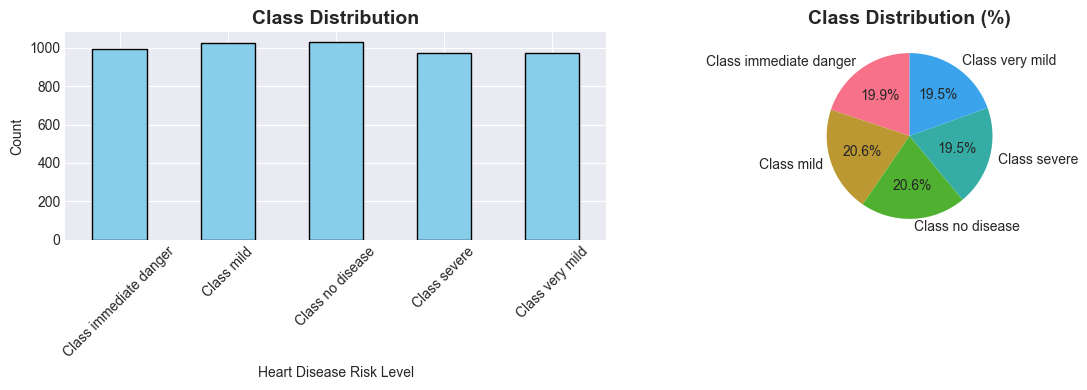


 Class distribution plot saved


In [183]:
target_col = df.columns[-1] 
print("CLASS DISTRIBUTION ANALYSIS")
class_dist = df[target_col].value_counts().sort_index()
class_labels = {
    0: "No Disease",
    1: "Very Mild",
    2: "Mild",
    3: "Severe",
    4: "Immediate Danger"
}

print("\nClass Distribution:")
for cls, count in class_dist.items():
    pct = (count / len(df)) * 100
    label = class_labels.get(cls, f"Class {cls}")
    print(f"  Class {cls} ({label}): {count} samples ({pct:.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
class_dist.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Heart Disease Risk Level')
axes[0].set_xticklabels([class_labels.get(i, f"Class {i}") for i in class_dist.index], rotation=45)

axes[1].pie(class_dist, labels=[class_labels.get(i, f"Class {i}") for i in class_dist.index],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('docs/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Class distribution plot saved")

Correlation Heatmap


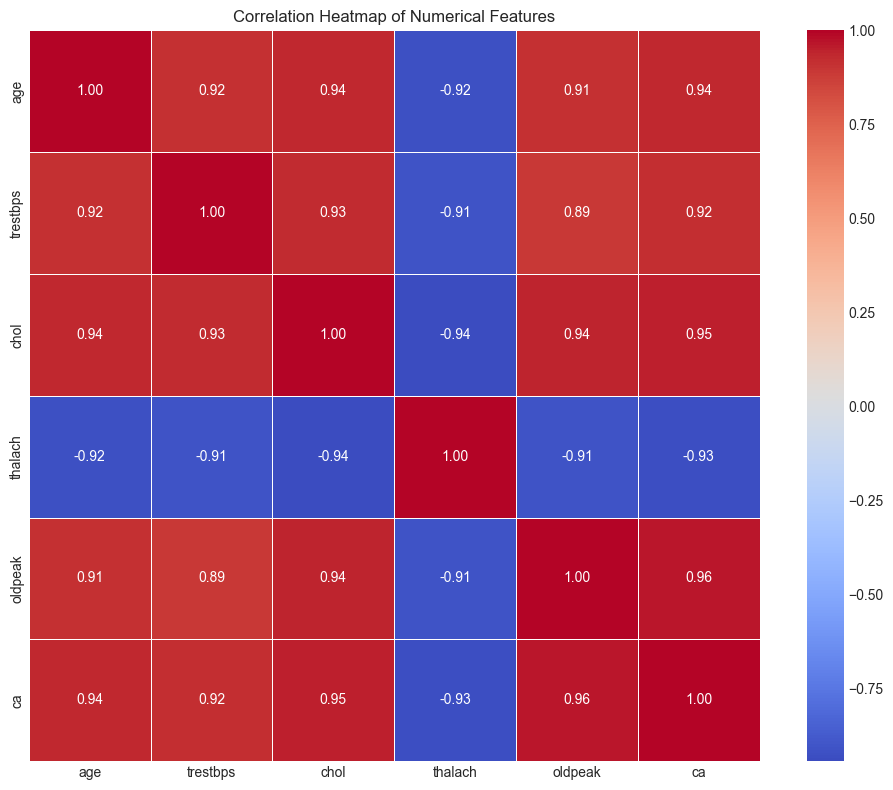

In [184]:
print("Correlation Heatmap")
numerical_data = X[numerical_features]
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


Box Plot: Age Distribution Across Heart Disease Classes


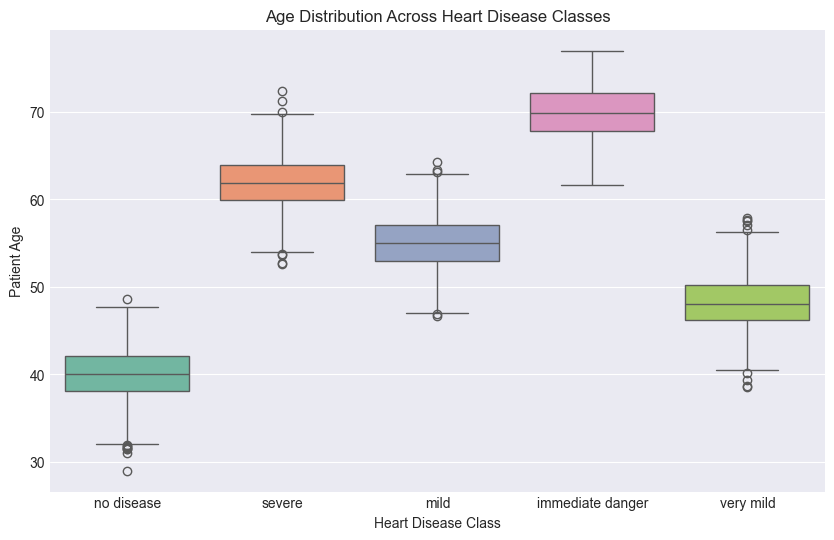

In [185]:
print("Box Plot: Age Distribution Across Heart Disease Classes")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x=target_col,   
    y='age',        
    data=df,        
    palette="Set2"
)
plt.xlabel("Heart Disease Class")
plt.ylabel("Patient Age")
plt.title("Age Distribution Across Heart Disease Classes")
plt.show()


Box Plot: Cholesterol Distribution Across Heart Disease Classes


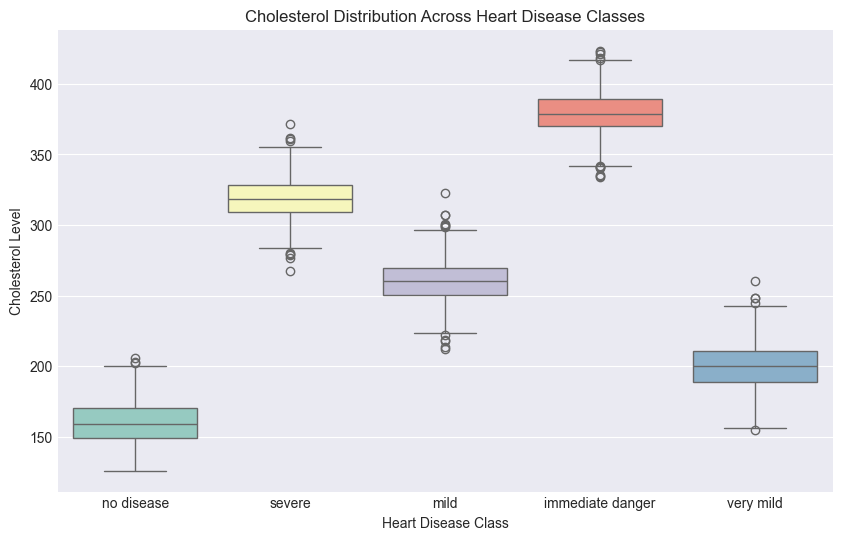

In [186]:
print("Box Plot: Cholesterol Distribution Across Heart Disease Classes")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x=target_col,    
    y='chol',        
    data=df,
    palette="Set3"
)
plt.xlabel("Heart Disease Class")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Distribution Across Heart Disease Classes")
plt.show()


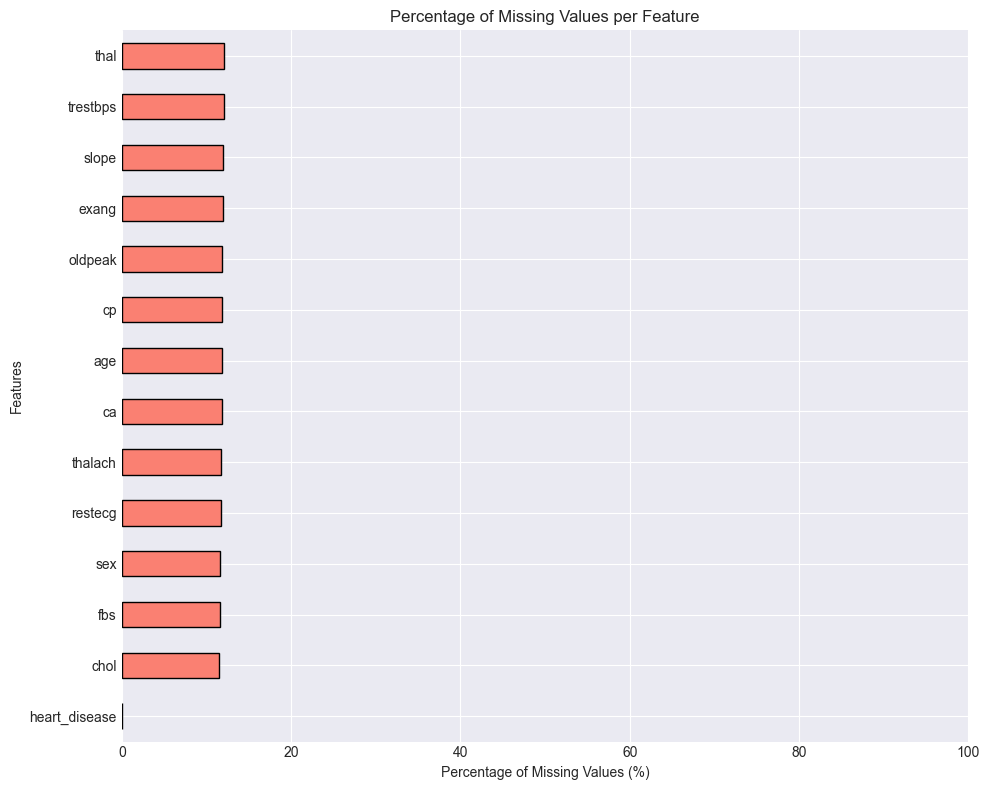

In [187]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.sort_values(ascending=True)  

plt.figure(figsize=(10, 8))
missing_percent.plot(kind='barh', color='salmon', edgecolor='black')

plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Features")
plt.title("Percentage of Missing Values per Feature")
plt.xlim(0, 100) 
plt.tight_layout()
plt.show()


<h2>PART 3: DATA PREPROCESSING </h2>

In [188]:

print("DATA PREPROCESSING")
X = df.drop(columns=[target_col])
y = df[target_col]

numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")

if X.isnull().sum().sum() > 0:
    print("\n Handling missing values...")
    
    X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
    
    for col in categorical_features:
        X[col] = X[col].fillna(X[col].mode()[0])
    
    print(" Missing values handled")
missing_counts = X.isnull().sum()
print(missing_counts)

if missing_counts.sum() == 0:
    print("No missing values remain in any feature")

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n All features are now numerical")



DATA PREPROCESSING

Numerical Features (6): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Categorical Features (7): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

 Handling missing values...
 Missing values handled
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
No missing values remain in any feature
  sex: {'Female': np.int64(0), 'Male': np.int64(1)}
  cp: {'Asymptomatic': np.int64(0), 'Atypical Angina': np.int64(1), 'Non-Anginal Pain': np.int64(2), 'Typical Angina': np.int64(3)}
  fbs: {'False': np.int64(0), 'True': np.int64(1)}
  restecg: {'LV hypertrophy': np.int64(0), 'Normal': np.int64(1), 'ST-T abnormality': np.int64(2)}
  exang: {'No': np.int64(0), 'Yes': np.int64(1)}
  slope: {'Downsloping': np.int64(0), 'Flat': np.int64(1), 'Upsloping': np.int64(2)}
  thal: {'Fixed defect': np.int64(0), 'Normal': np.int64(1),

In [189]:
print("TRAIN-TEST SPLIT (STRATIFIED)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Data split and scaling completed")

TRAIN-TEST SPLIT (STRATIFIED)

Training set size: (4000, 13)
Test set size: (1000, 13)

Training set class distribution:
heart_disease
immediate danger    795
mild                823
no disease          824
severe              779
very mild           779
Name: count, dtype: int64

Test set class distribution:
heart_disease
immediate danger    199
mild                205
no disease          206
severe              195
very mild           195
Name: count, dtype: int64

 Data split and scaling completed


<h2>PART 4: MODEL TRAINING AND EVALUATION</h2>

In [190]:
print("MODEL 1: RANDOM FOREST CLASSIFIER")
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best CV Score: {rf_grid.best_score_:.4f}")

rf_train_acc = rf_grid.score(X_train, y_train)
rf_test_acc = rf_grid.score(X_test, y_test)

print(f"Training Accuracy: {rf_train_acc:.4f}")
print(f"Test Accuracy: {rf_test_acc:.4f}")
print(f"Overfitting Gap: {(rf_train_acc - rf_test_acc):.4f}")

MODEL 1: RANDOM FOREST CLASSIFIER
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best CV Score: 0.9995
Training Accuracy: 0.9995
Test Accuracy: 0.9990
Overfitting Gap: 0.0005


In [191]:
print("MODEL 2: GRADIENT BOOSTING CLASSIFIER")

gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7]
}

gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Best CV Score: {gb_grid.best_score_:.4f}")

gb_train_acc = gb_grid.score(X_train, y_train)
gb_test_acc = gb_grid.score(X_test, y_test)

print(f"Training Accuracy: {gb_train_acc:.4f}")
print(f"Test Accuracy: {gb_test_acc:.4f}")
print(f"Overfitting Gap: {(gb_train_acc - gb_test_acc):.4f}")

MODEL 2: GRADIENT BOOSTING CLASSIFIER
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best CV Score: 0.9968
Training Accuracy: 1.0000
Test Accuracy: 0.9980
Overfitting Gap: 0.0020


In [192]:
print("MODEL 3: SUPPORT VECTOR MACHINE")
svm_params = {
    'C': [1, 10],
    'kernel': ['rbf', 'linear']
}

svm = SVC(random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Best CV Score: {svm_grid.best_score_:.4f}")

svm_train_acc = svm_grid.score(X_train_scaled, y_train)
svm_test_acc = svm_grid.score(X_test_scaled, y_test)

print(f"Training Accuracy: {svm_train_acc:.4f}")
print(f"Test Accuracy: {svm_test_acc:.4f}")
print(f"Overfitting Gap: {(svm_train_acc - svm_test_acc):.4f}")

MODEL 3: SUPPORT VECTOR MACHINE
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best CV Score: 0.9975
Training Accuracy: 0.9998
Test Accuracy: 0.9970
Overfitting Gap: 0.0028


In [193]:
print("MODEL 4: K-NEAREST NEIGHBORS")

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Best CV Score: {knn_grid.best_score_:.4f}")

knn_train_acc = knn_grid.score(X_train_scaled, y_train)
knn_test_acc = knn_grid.score(X_test_scaled, y_test)

print(f"Training Accuracy: {knn_train_acc:.4f}")
print(f"Test Accuracy: {knn_test_acc:.4f}")
print(f"Overfitting Gap: {(knn_train_acc - knn_test_acc):.4f}")


MODEL 4: K-NEAREST NEIGHBORS
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best CV Score: 0.9895
Training Accuracy: 1.0000
Test Accuracy: 0.9870
Overfitting Gap: 0.0130


<h4> MODEL COMPARISON AND SELECTION</h4>

MODEL COMPARISON SUMMARY TABLE

             Model  Train Accuracy  Test Accuracy  CV Score  Overfitting Gap
    Random Forest         0.99950          0.999  0.999500          0.00050
Gradient Boosting         1.00000          0.998  0.996751          0.00200
              SVM         0.99975          0.997  0.997500          0.00275
              KNN         1.00000          0.987  0.989499          0.01300


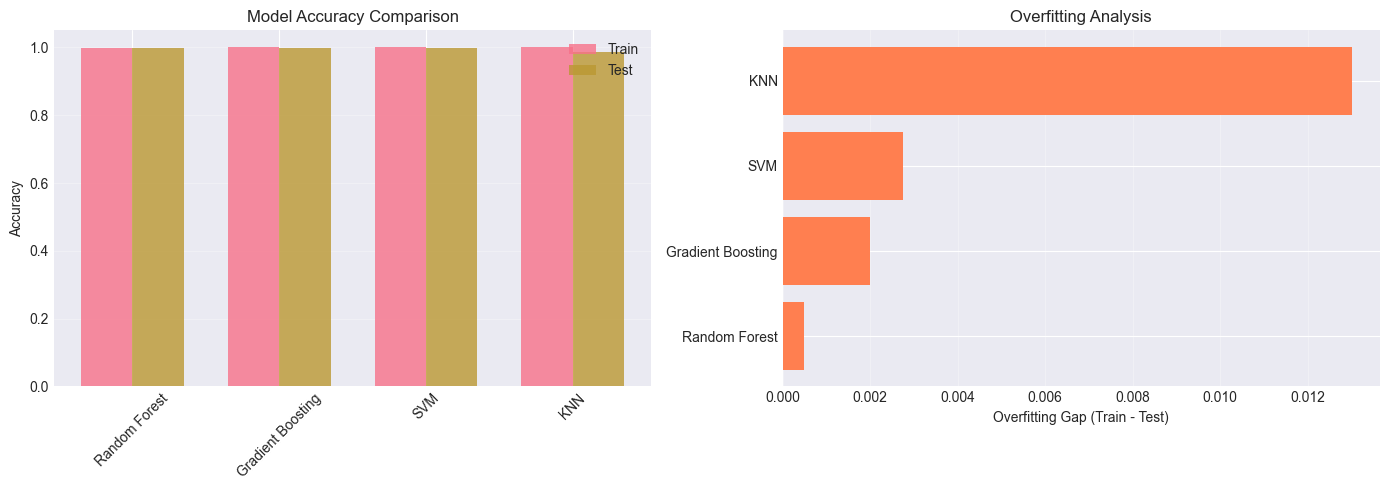


 BEST MODEL SELECTED: Random Forest (Test Accuracy: 0.9990)


In [194]:
print("MODEL COMPARISON SUMMARY TABLE")
comparison_data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN'],
    'Train Accuracy': [rf_train_acc, gb_train_acc, svm_train_acc, knn_train_acc],
    'Test Accuracy': [rf_test_acc, gb_test_acc, svm_test_acc, knn_test_acc],
    'CV Score': [rf_grid.best_score_, gb_grid.best_score_, svm_grid.best_score_, 
                 knn_grid.best_score_]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Overfitting Gap'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("\n", comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(comparison_df))
width = 0.35
axes[0].bar(x - width/2, comparison_df['Train Accuracy'], width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, comparison_df['Test Accuracy'], width, label='Test', alpha=0.8)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].barh(comparison_df['Model'], comparison_df['Overfitting Gap'], color='coral')
axes[1].set_xlabel('Overfitting Gap (Train - Test)')
axes[1].set_title('Overfitting Analysis')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('docs/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

best_model_name = comparison_df.iloc[0]['Model']
best_test_acc = comparison_df.iloc[0]['Test Accuracy']
print(f"\n BEST MODEL SELECTED: {best_model_name} (Test Accuracy: {best_test_acc:.4f})")


<h4> DETAILED  BEST MODEL</h4>

In [195]:
print(f"DETAILED EVALUATION - {best_model_name.upper()}")
best_model_obj = gb_grid.best_estimator_  # Assuming GB is best
y_pred = best_model_obj.predict(X_test)
y_pred_proba = best_model_obj.predict_proba(X_test)


print("\n CLASSIFICATION REPORT:")
class_report = classification_report(y_test, y_pred, 
                                     target_names=[class_labels[i] for i in range(5)],
                                     digits=4)
print(class_report)

DETAILED EVALUATION - RANDOM FOREST

 CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

      No Disease     1.0000    0.9950    0.9975       199
       Very Mild     0.9951    1.0000    0.9976       205
            Mild     1.0000    0.9951    0.9976       206
          Severe     0.9949    1.0000    0.9974       195
Immediate Danger     1.0000    1.0000    1.0000       195

        accuracy                         0.9980      1000
       macro avg     0.9980    0.9980    0.9980      1000
    weighted avg     0.9980    0.9980    0.9980      1000



CONFUSION MATRIX ANALYSIS

Confusion Matrix:
[[198   0   0   1   0]
 [  0 205   0   0   0]
 [  0   1 205   0   0]
 [  0   0   0 195   0]
 [  0   0   0   0 195]]


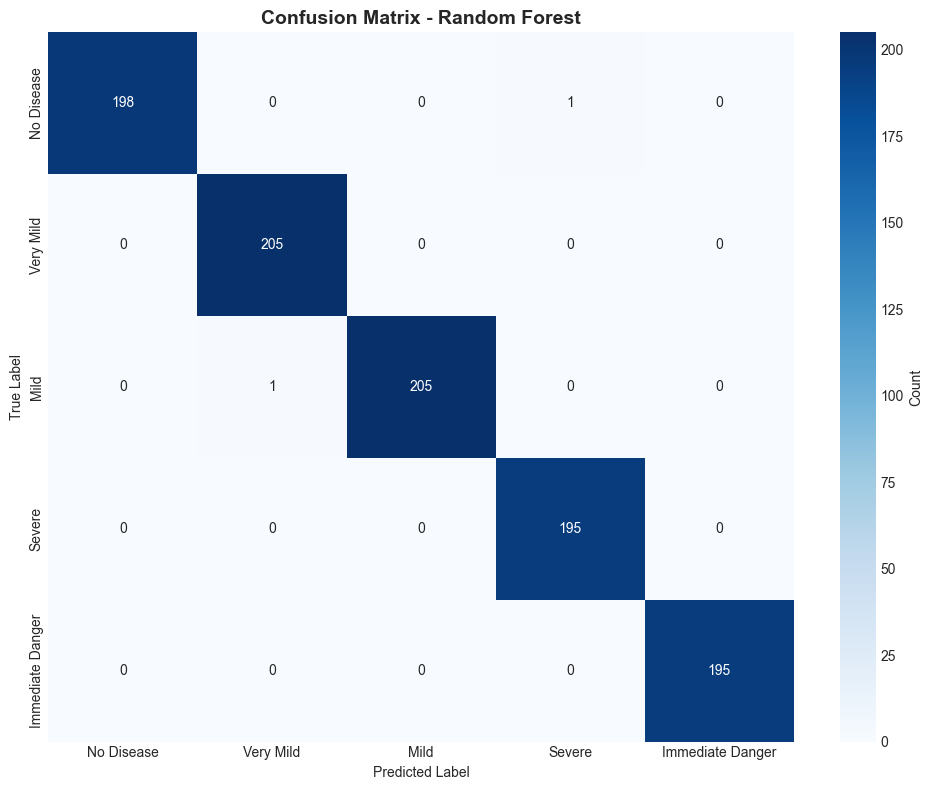


 Confusion matrix visualization saved


In [196]:
print("CONFUSION MATRIX ANALYSIS")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[class_labels[i] for i in range(5)],
            yticklabels=[class_labels[i] for i in range(5)],
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('docs/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Confusion matrix visualization saved")

FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
 Feature  Importance
      cp    0.361578
      ca    0.218387
 oldpeak    0.183557
    thal    0.171998
    chol    0.050822
   slope    0.005156
   exang    0.003453
     age    0.001880
 thalach    0.001827
trestbps    0.001262


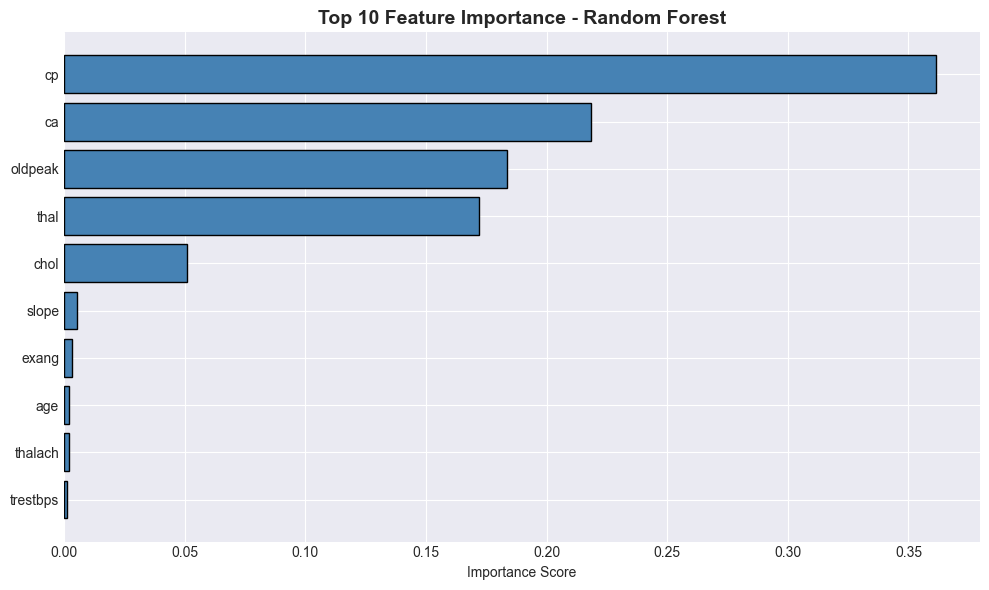


 Feature importance plot saved


In [197]:
print("FEATURE IMPORTANCE ANALYSIS")

feature_importance = best_model_obj.feature_importances_
feature_names = X.columns.tolist()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), 
         color='steelblue', edgecolor='black')
plt.xlabel('Importance Score')
plt.title(f'Top 10 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('docs/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Feature importance plot saved")

<h2>PART 5: MODEL PERSISTENCE</h2>

In [198]:
print("SAVING MODEL AND ARTIFACTS")
os.makedirs('deployment', exist_ok=True)
joblib.dump(best_model_obj, 'deployment/best_model.pkl')
print(" Model saved: deployment/best_model.pkl")

joblib.dump(scaler, 'deployment/scaler.pkl')
print(" Scaler saved: deployment/scaler.pkl")

joblib.dump(feature_names, 'deployment/feature_names.pkl')
print(" Feature names saved: deployment/feature_names.pkl")
joblib.dump(feature_names, 'deployment/feature_columns.txt')
print(" Feature names saved: deployment/feature_columns.txt")

joblib.dump(class_labels, 'deployment/class_labels.pkl')
print(" Class labels saved: deployment/class_labels.pkl")
joblib.dump(class_labels, 'deployment/class_names.txt')
print(" Class labels saved: deployment/class_names.txt")


model_info = {
    'model_name': best_model_name,
    'test_accuracy': float(best_test_acc),
    'train_accuracy': float(best_model_obj.score(X_train, y_train)),
    'feature_names': feature_names,
    'class_labels': class_labels,
    'num_features': len(feature_names),
    'num_classes': 5
}

joblib.dump(model_info, 'deployment/model_info.pkl')
print(" Model info saved: deployment/model_info.pkl")

print("\n ALL ARTIFACTS SAVED SUCCESSFULLY")

SAVING MODEL AND ARTIFACTS
 Model saved: deployment/best_model.pkl
 Scaler saved: deployment/scaler.pkl
 Feature names saved: deployment/feature_names.pkl
 Feature names saved: deployment/feature_columns.txt
 Class labels saved: deployment/class_labels.pkl
 Class labels saved: deployment/class_names.txt
 Model info saved: deployment/model_info.pkl

 ALL ARTIFACTS SAVED SUCCESSFULLY


In [199]:
model_path = 'deployment/best_model.pkl'

loaded_model = joblib.load(model_path)

sample_df = X_test.sample(n=10, random_state=42)
actual_labels = y_test.loc[sample_df.index]
predicted_labels = loaded_model.predict(sample_df)
verification_1_df = pd.DataFrame({
    "Actual Class": actual_labels.values,
    "Predicted Class": predicted_labels
}, index=sample_df.index)

print("\nVerification 1 – Actual vs Predicted")
verification_1_df


Verification 1 – Actual vs Predicted


,Actual Class,Predicted Class
2915,mild,mild
3145,mild,mild
4389,mild,mild
2617,no disease,no disease
4614,mild,mild
4170,very mild,very mild
4402,very mild,very mild
1817,very mild,very mild
1505,very mild,very mild
778,very mild,very mild


In [200]:
new_patients = pd.DataFrame([
    {
        "age": 55,
        "sex": "male",
        "trestbps": 140,
        "chol": 240,
        "fbs": "no",
        "thalach": 150,
        "oldpeak": 1.2,
        "cp": "typical angina",
        "restecg": "normal",
        "exang": "no",
        "slope": "upsloping",
        "ca": 0,
        "thal": "normal"
    },
    {
        "age": 68,
        "sex": "female",
        "trestbps": 170,
        "chol": 300,
        "fbs": "yes",
        "thalach": 110,
        "oldpeak": 3.5,
        "cp": "asymptomatic",
        "restecg": "abnormal",
        "exang": "yes",
        "slope": "flat",
        "ca": 3,
        "thal": "reversible defect"
    }
])

# Ensure correct column order
new_patients = new_patients[feature_names]

new_patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,male,typical angina,140,240,no,normal,150,no,1.2,upsloping,0,normal
1,68,female,asymptomatic,170,300,yes,abnormal,110,yes,3.5,flat,3,reversible defect
